# Projects -Optimizing Retail Banking Strategies Through RFM-Based Customer Segmentation

## 03 – Exploratory Data Analysis: Transaction Patterns

In this step, we explore customer **transaction behaviors** to uncover insights on monetary activity. This will help us later on during **RFM feature engineering** and customer segmentation.

### 🧾 Objectives
- Analyze the **distribution of transaction amounts**
- Identify **high-value vs low-value transactions**
- Generate **summary statistics** on customer spending
- Explore how transaction behavior varies by **age group**, **gender**, and **location**

### 📌 Key Columns Used
- `TransactionAmount (INR)`
- `TransactionDate`
- `CustGender`
- `CustLocation`
- `age` or `age_group`

---

#### 🔍 1. Distribution of Transaction Amounts

We’ll examine how transaction amounts vary across the dataset to identify outliers, skewness, or dominant spending patterns.

#### 🔍 2. Summary Statistics

We'll generate descriptive stats (mean, median, std, etc.) to understand the central tendency and dispersion of monetary activity.

#### 🔍 3. Transaction Amounts by Profile

We analyze how spending behavior changes across demographic segments such as **age group**, **gender**, and **location**.

---

**Import libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load dataset**

In [11]:
df = pd.read_csv('dataset/bank_data_C_cleanedv2.csv')

df.head()

,Unnamed: 0.1,Unnamed: 0,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age,age_group
0,0,0,T1,C5841053,1994-01-10 00:00:00.000000000,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,15–25
1,1,1,T2,C2142763,1957-04-04 00:00:00.000000000,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,46–60
2,2,2,T3,C4417068,1996-11-26 00:00:00.000000000,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,15–25
3,3,3,T4,C5342380,1973-09-14 00:00:00.000000000,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,36–45
4,4,4,T5,C9031234,1988-03-24 00:00:00.000000000,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,26–35


**1. Distribution of Transaction Amounts**

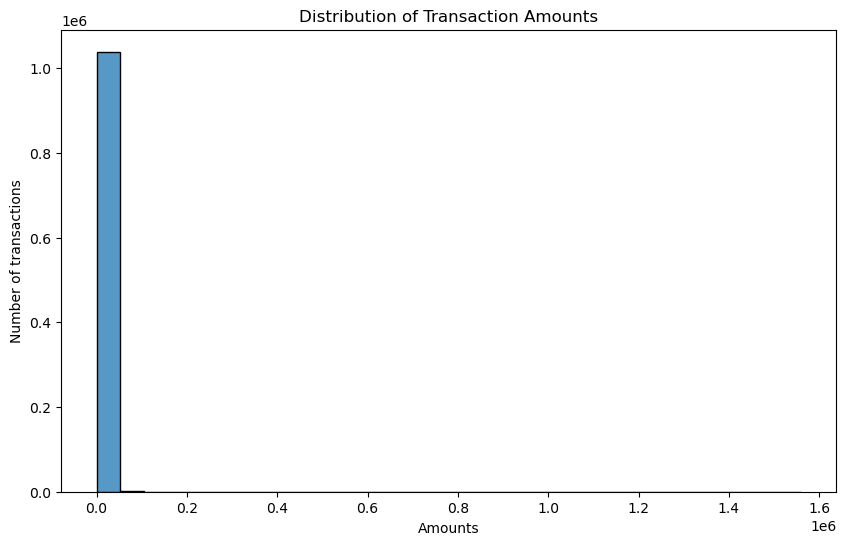

In [33]:
plt.figure(figsize = (10,6))
sns.histplot(df['TransactionAmount (INR)'], bins = 30, kde = False)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amounts')
plt.ylabel('Number of transactions')
plt.show()

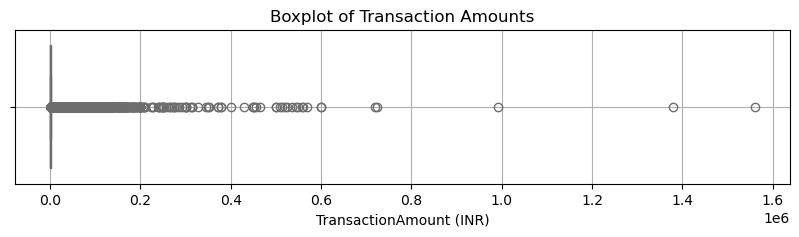

In [37]:
# Boxplot to Detect Outliers
plt.figure(figsize = (10,2))
sns.boxplot(x = df['TransactionAmount (INR)'], color = 'salmon')
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('TransactionAmount (INR)')
plt.grid(True)
plt.show()

**2. Summary Statistics of Transaction Amounts**

In [48]:
Sumary_Stat_TransAmount = df['TransactionAmount (INR)'].describe()
print('Summary Statistics of Transactions Amounts\n')
print(Sumary_Stat_TransAmount)

Summary Statistics of Transactions Amounts

count    1.040794e+06
mean     1.567330e+03
std      6.563901e+03
min      1.000000e-02
25%      1.614700e+02
50%      4.589000e+02
75%      1.200000e+03
max      1.560035e+06
Name: TransactionAmount (INR), dtype: float64


In [62]:
# median and mode
Median_TransAmount = df['TransactionAmount (INR)'].median()
Mode_TransAmount = df['TransactionAmount (INR)'].mode().values[0]

print(f"The transactions Amounts median is : {Median_TransAmount}")
print(f"The transactions Amounts mode is : {Mode_TransAmount}")

The transactions Amounts median is : 458.9
The transactions Amounts mode is : 100.0


**3. Transaction Amounts by Profile**

In [78]:
df.head()

,Unnamed: 0.1,Unnamed: 0,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age,age_group,LogTransactionAmount
0,0,0,T1,C5841053,1994-01-10 00:00:00.000000000,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,15–25,3.258097
1,1,1,T2,C2142763,1957-04-04 00:00:00.000000000,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,46–60,10.239960
2,2,2,T3,C4417068,1996-11-26 00:00:00.000000000,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,15–25,6.131226
3,3,3,T4,C5342380,1973-09-14 00:00:00.000000000,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,36–45,7.630947
4,4,4,T5,C9031234,1988-03-24 00:00:00.000000000,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,26–35,7.475056


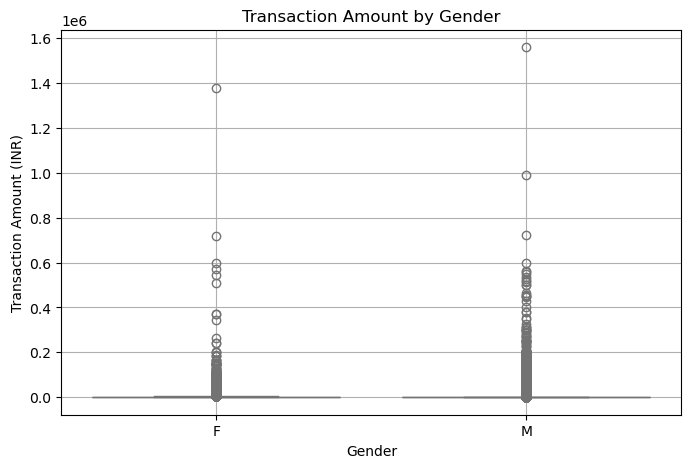

In [99]:
# Transaction Amount by Gender

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='CustGender', y='TransactionAmount (INR)', palette='pastel', hue='CustGender', legend=False)
plt.title('Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount (INR)')
plt.grid(True)
plt.show()

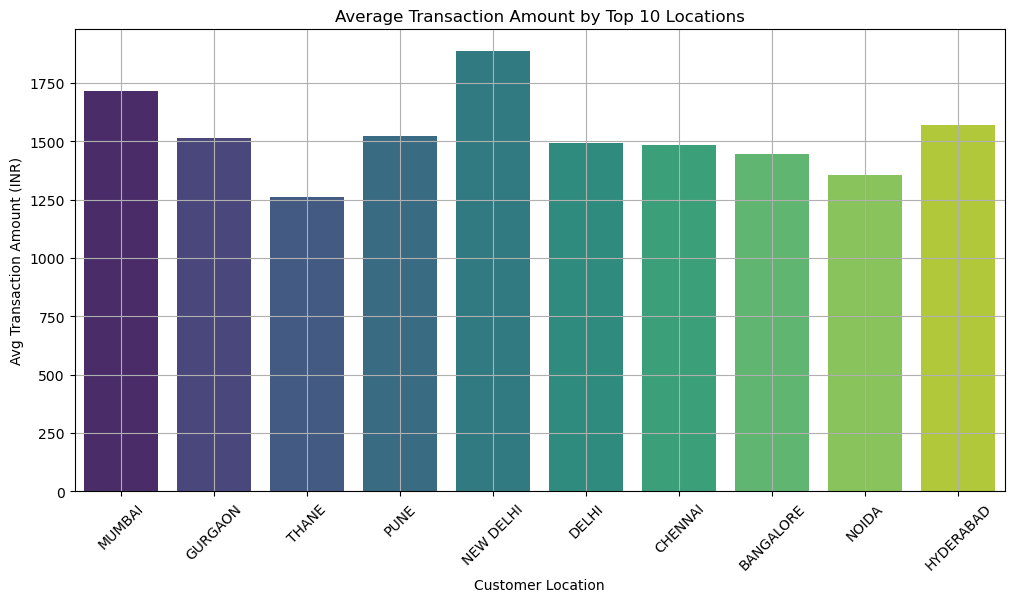

In [103]:
# Average Transaction Amount by Location (Top 10)

top_locations = df['CustLocation'].value_counts().nlargest(10).index
top_df = df[df['CustLocation'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_df, x='CustLocation', y='TransactionAmount (INR)', estimator='mean', errorbar=None, palette='viridis', hue='CustLocation', legend=False)
plt.title('Average Transaction Amount by Top 10 Locations')
plt.xlabel('Customer Location')
plt.ylabel('Avg Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()